In [1]:
import logging
import numpy as np
import pandas as pd
import h5py as h5
from collections import namedtuple
import matplotlib.pyplot as plt
import datetime as dt

logging.basicConfig(
    level='INFO',
    format='[%(asctime)s %(levelname)s] %(message)s'
)

init_shapes = [(0,60), (0,3)] # Input, Target shapes respectively

# Exploring data structure

In [143]:
datadir = 'data/'
infile = 'naturalsplittrainingsample.h5'

logging.info('Loading data from {}{}'.format(datadir,infile))

with h5.File(datadir+infile, 'r') as data:
    data_x = data['input'][()]
    data_y = data['target'][()]

[2020-11-29 18:09:46,131 INFO] Loading data from data/naturalsplittrainingsample.h5


In [144]:
outDir = 'output/sample_distributions/'+infile.split('.')[0]+'/'
if not os.path.exists(outDir):
    os.mkdir(outDir)

EndcapMask = data_x[:,57]!=0
BarrelMask = np.logical_and(data_x[:,56]!=0, data_x[:,57]==0)
IBLMask = np.logical_and(data_x[:,56]==0, data_x[:,57]==0)

# IBLMask = np.logical_and(data_x[:,0] == 0, data_x[:,1] == 0)
# BarrelMask = np.logical_and(data_x[:,0] > 0, data_x[:,1] == 0)
# EndcapMask = data_x[:,1] != 0
# data_x[:,2][data_x[:,2]==0] = 4

data_y_flat = np.copy(data_y)
data_y_flat[:,1] *= 2
data_y_flat[:,2] *= 3
data_y_flat
data_y_flat = data_y_flat[:,0] + data_y_flat[:,1] + data_y_flat[:,2]

data_x.shape

(17000000L, 60L)

Plot layer distribution

In [145]:
def data_hist(name, bins, hist):
    plt.bar(np.asarray(bins)-0.5, hist)
    if(name=='layer'):
        plt.xticks(np.asarray(bins)-0.5, labels)
        print(pd.Series(hist,index=labels))
    else:
        plt.xticks([0,1,2,3])
        print(pd.Series(hist,index=np.asarray(bins)-0.5))
    plt.grid(axis='y')
    plt.ylabel("Clusters")
    plt.xlabel("Pixel Detector Layer")
    plt.title('{} {} distribution'.format(infile, name))
    plt.savefig('{}{}_{}_distribution.png'.format(outDir, infile, name.replace(' ', '_')))
    plt.show()

Barrel    12126632
IBL        4537560
Endcap      335808
dtype: int64
Barrel    12126632
IBL        4537560
Endcap      335808
dtype: int64


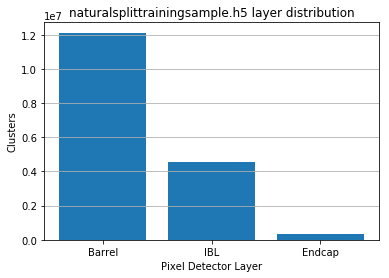

In [146]:
hist = [np.sum(BarrelMask), np.sum(IBLMask), np.sum(EndcapMask)]
bins = [1,2,3]
labels = ['Barrel', 'IBL', 'Endcap']
print(pd.Series(hist,index=labels))

data_hist('layer', bins, hist)


plot total label distribution

1.0    3740000
2.0    4420000
3.0    8840000
dtype: int64


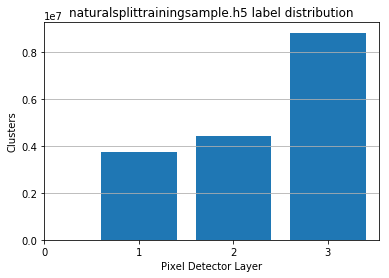

In [147]:
bins = [0.5, 1.5, 2.5, 3.5]
hist = np.histogram(data_y_flat, bins=bins)

data_hist('label', bins[1:], hist[0])

Plot label distribution for each layer

[2020-11-29 18:10:09,562 INFO] [0.5 1.5 2.5 3.5]
[2020-11-29 18:10:09,565 INFO] [ 860051 1009779 2667730]
1.0     860051
2.0    1009779
3.0    2667730
dtype: int64


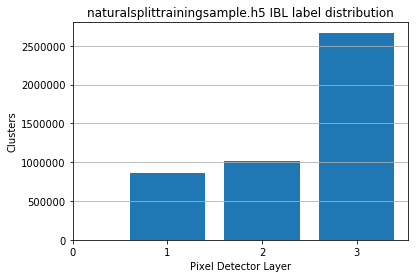

In [148]:
hist = np.histogram(data_y_flat[IBLMask], bins=bins)
logging.info(hist[1])
logging.info(hist[0])

data_hist('IBL label', bins[1:], hist[0])

[2020-11-29 18:10:10,058 INFO] [0.5 1.5 2.5 3.5]
[2020-11-29 18:10:10,059 INFO] [2718758 3307767 6100107]
1.0    2718758
2.0    3307767
3.0    6100107
dtype: int64


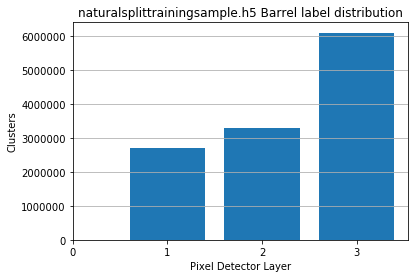

In [149]:
hist = np.histogram(data_y_flat[BarrelMask], bins=bins)
logging.info(hist[1])
logging.info(hist[0])

data_hist('Barrel label', bins[1:], hist[0])

[2020-11-29 18:10:10,352 INFO] [0.5 1.5 2.5 3.5]
[2020-11-29 18:10:10,355 INFO] [161191 102454  72163]
1.0    161191
2.0    102454
3.0     72163
dtype: int64


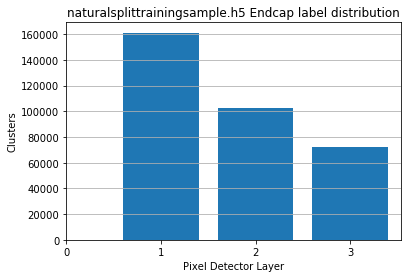

In [150]:
hist = np.histogram(data_y_flat[EndcapMask], bins=bins)
logging.info(hist[1])
logging.info(hist[0])

data_hist('Endcap label', bins[1:], hist[0])

# Shuffle Data
### Shuffle each layer sample

In [151]:
datadir = 'data/'
infiles = ['barreltraining.h5', 'ibltraining.h5', 'endcaptraining.h5']

In [160]:
logging.info('Loading data from directory {}'.format(datadir))
for i, layerFile in enumerate(infiles):
    # rng = np.random.default_rng(seed=42)
    np.random.seed(seed=42)
    rng = np.random
    logging.info('Loading data from {}'.format(layerFile))
    with h5.File(datadir + layerFile, 'r') as data:
        data_x = data['input'][()]
        data_y = data['target'][()]

    logging.info('Shuffling')
    s = np.arange(data_x.shape[0])
    rng.shuffle(s)
    data_x = data_x[s]
    data_y = data_y[s]

    outfile = '{}_shuffled.h5'.format(layerFile.split('.')[0])
    logging.info('Saving {}'.format(outfile))
    with h5.File(datadir + outfile, 'w') as hfile:
        hfile.create_dataset('input', data=data_x.astype(np.float32), compression='gzip')
        hfile.create_dataset('target', data=data_y.astype(np.float32), compression='gzip')

[2020-11-29 18:18:07,927 INFO] Loading data from directory data/
[2020-11-29 18:18:07,930 INFO] Loading data from barreltraining.h5
[2020-11-29 18:18:19,681 INFO] Shuffling
[2020-11-29 18:18:24,483 INFO] Saving barreltraining_shuffled.h5
[2020-11-29 18:19:02,256 INFO] Loading data from ibltraining.h5
[2020-11-29 18:19:13,851 INFO] Shuffling
[2020-11-29 18:19:18,576 INFO] Saving ibltraining_shuffled.h5
[2020-11-29 18:19:55,592 INFO] Loading data from endcaptraining.h5
[2020-11-29 18:20:01,381 INFO] Shuffling
[2020-11-29 18:20:03,513 INFO] Saving endcaptraining_shuffled.h5


Save equalfrac

In [162]:
# datadir = 'data/jz7w/evensplitlayers/'
# infiles = ['barrel.h5', 'ibl.h5', 'endcap.h5']

total_train_clusters = int(12e6)
clusters_per_layer = int(total_train_clusters/3)
labels_per_layer = int(clusters_per_layer/3)

for layerFile in infiles:
    logging.info('Loading {}_shuffled.h5'.format(layerFile.split('.')[0]))
    filename = '{}_shuffled.h5'.format(layerFile.split('.')[0])
    with h5.File(datadir + filename, 'r') as data:
        data_x = data['input'][()]
        data_y = data['target'][()]
    '''
    EndcapMask = data_x[:,57]!=0
    BarrelMask = np.logical_and(data_x[:,56]!=0, data_x[:,57]==0)
    IBLMask = np.logical_and(data_x[:,56]==0, data_x[:,57]==0)
    '''
    data_y_estimated = data_y[:,0] + 2*data_y[:,1] + 3*data_y[:,2]
    particle_mask = [data_y_estimated == 1, data_y_estimated == 2, data_y_estimated == 3]
    hist = np.histogram(data_y_estimated, bins=[0,1.5,2.5,3.5])
    logging.info('Number of clusters per label \n1-particle: {} \n2-particle: {} \n3-particle: {}'.format(*hist[0]))

    data_x_new = np.empty((0,data_x.shape[1]))
    data_y_new = np.empty((0,data_y.shape[1]))
    logging.info('Getting clusters from {}'.format(filename))
    for i,mask in enumerate(particle_mask):
        data_x_new = np.append(data_x_new, data_x[particle_mask[i]][:labels_per_layer], axis=0)
        data_y_new = np.append(data_y_new, data_y[particle_mask[i]][:labels_per_layer], axis=0)

    
    del data_x, data_y

    outfile = '{}_equalfrac.h5'.format(layerFile.split('.')[0])
    logging.info('Saving clusters to data/' + outfile)
    with h5.File(datadir + outfile, 'w') as hfile:
        hfile.create_dataset('input', data=data_x_new.astype(np.float32), compression='gzip')
        hfile.create_dataset('target', data=data_y_new.astype(np.float32), compression='gzip')

    del data_x_new, data_y_new


[2020-11-29 18:21:11,016 INFO] Loading barreltraining_shuffled.h5
[2020-11-29 18:21:21,744 INFO] Number of clusters per label 
1-particle: 3300000 
2-particle: 3300000 
3-particle: 3400000
[2020-11-29 18:21:21,746 INFO] Getting clusters from barreltraining_shuffled.h5
[2020-11-29 18:21:25,641 INFO] Saving clusters to data/barreltraining_equalfrac.h5
[2020-11-29 18:21:39,926 INFO] Loading ibltraining_shuffled.h5
[2020-11-29 18:21:50,388 INFO] Number of clusters per label 
1-particle: 3300000 
2-particle: 3300000 
3-particle: 3400000
[2020-11-29 18:21:50,390 INFO] Getting clusters from ibltraining_shuffled.h5
[2020-11-29 18:21:54,625 INFO] Saving clusters to data/ibltraining_equalfrac.h5
[2020-11-29 18:22:08,691 INFO] Loading endcaptraining_shuffled.h5
[2020-11-29 18:22:14,121 INFO] Number of clusters per label 
1-particle: 3300000 
2-particle: 1374298 
3-particle: 357989
[2020-11-29 18:22:14,125 INFO] Getting clusters from endcaptraining_shuffled.h5
[2020-11-29 18:22:16,809 INFO] Saving

# Save Training Sample

Equal Layers, Equal Fraction. Duplicate any insufficient data to reach a certain number of labels per layer.

In [167]:
# datadir = 'data/jz7w/evensplitlayers/'
# infiles = ['barrel.h5', 'ibl.h5', 'endcap.h5']

outfile = '824_train.h5'

#total_train_clusters = int(20e6)
#clusters_per_layer = int(total_train_clusters/3)
#labels_per_layer = int(clusters_per_layer/3)
labels_per_layer = int(1374298) # 1374298 is the number of 2 particle clusters in the endcap from endcaptraining.h5

init_shapes = [(0,60), (0,3)]

In [169]:
with h5.File('data/' + outfile, 'w') as hfile:
    hfile.create_dataset('input', data=np.empty(init_shapes[0], dtype=np.float32), compression='gzip', chunks=True, maxshape=(None,init_shapes[0][1]))
    hfile.create_dataset('target', data=np.empty(init_shapes[1], dtype=np.float32), compression='gzip', chunks=True, maxshape=(None,init_shapes[1][1]))

for layerFile in infiles:
    logging.info('Loading {}_shuffled.h5'.format(layerFile.split('.')[0]))
    filename = '{}_shuffled.h5'.format(layerFile.split('.')[0])
    with h5.File(datadir + filename, 'r') as data:
        data_x = data['input'][()]
        data_y = data['target'][()]
    '''
    EndcapMask = data_x[:,57]!=0
    BarrelMask = np.logical_and(data_x[:,56]!=0, data_x[:,57]==0)
    IBLMask = np.logical_and(data_x[:,56]==0, data_x[:,57]==0)
    '''
    data_y_estimated = data_y[:,0] + 2*data_y[:,1] + 3*data_y[:,2]
    particleMask = [data_y_estimated == 1, data_y_estimated == 2, data_y_estimated == 3]
    hist = np.histogram(data_y_estimated, bins=[0,1.5,2.5,3.5])
    logging.info('Number of clusters per label \n1-particle: {} \n2-particle: {} \n3-particle: {}'.format(*hist[0]))

    add_per_label = [labels_per_layer - i for i in hist[0]]
    logging.info('Add clusters per label \n1-particle: {} \n2-particle: {} \n3-particle: {}'.format(*add_per_label))

    data_x_new = np.empty((0,data_x.shape[1]))
    data_y_new = np.empty((0,data_y.shape[1]))
    logging.info('Getting clusters from {}'.format(filename))
    for i,add in enumerate(add_per_label):
        if add <= 0:
            data_x_new = np.append(data_x_new, data_x[particleMask[i]][:labels_per_layer], axis=0)
            data_y_new = np.append(data_y_new, data_y[particleMask[i]][:labels_per_layer], axis=0)
        else:
            add_index = np.remainder(np.array(range(labels_per_layer)), np.array(data_x[particleMask[i]].shape[0]))
            data_x_new = np.append(data_x_new, data_x[particleMask[i]][add_index], axis=0)
            data_y_new = np.append(data_y_new, data_y[particleMask[i]][add_index], axis=0)
    
    del data_x, data_y

    logging.info('Saving clusters to data/' + outfile)
    with h5.File('data/' + outfile, 'a') as hfile:
        hfile['input'].resize((hfile['input'].shape[0] + data_x_new.shape[0]), axis=0)
        hfile['input'][-data_x_new.shape[0]:] =  data_x_new.astype(np.float32)
        hfile['target'].resize((hfile['target'].shape[0] + data_y_new.shape[0]), axis=0)
        hfile['target'][-data_y_new.shape[0]:] =  data_y_new.astype(np.float32)

    del data_x_new, data_y_new


[2020-11-29 18:25:36,053 INFO] Loading barreltraining_shuffled.h5
[2020-11-29 18:25:46,726 INFO] Number of clusters per label 
1-particle: 3300000 
2-particle: 3300000 
3-particle: 3400000
[2020-11-29 18:25:46,730 INFO] Add clusters per label 
1-particle: -1925702 
2-particle: -1925702 
3-particle: -2025702
[2020-11-29 18:25:46,732 INFO] Getting clusters from barreltraining_shuffled.h5
[2020-11-29 18:25:51,115 INFO] Saving clusters to data/814_train.h5
[2020-11-29 18:26:06,216 INFO] Loading ibltraining_shuffled.h5
[2020-11-29 18:26:16,585 INFO] Number of clusters per label 
1-particle: 3300000 
2-particle: 3300000 
3-particle: 3400000
[2020-11-29 18:26:16,588 INFO] Add clusters per label 
1-particle: -1925702 
2-particle: -1925702 
3-particle: -2025702
[2020-11-29 18:26:16,588 INFO] Getting clusters from ibltraining_shuffled.h5
[2020-11-29 18:26:20,903 INFO] Saving clusters to data/814_train.h5
[2020-11-29 18:26:36,605 INFO] Loading endcaptraining_shuffled.h5
[2020-11-29 18:26:42,384 I

# Normalize Training and Testing Samples

In [193]:
datadir = 'data/'
infile = '824_train.h5'

logging.info('Loading data from {}{}'.format(datadir,infile))

with h5.File(datadir+infile, 'r') as data:
    data_x = data['input'][()]
    data_y = data['target'][()]

logging.info('Offsetting and Scaling...')
means = np.mean(data_x, axis=0) # offset = mean
stds = np.std(data_x, axis=0) # scale = 1/std

np.savetxt(datadir+'means.txt', means)
np.savetxt(datadir+'stds.txt', stds)

data_x_scaled = (data_x-means)*(1.0/stds)

outfile = datadir+infile.split('.')[0]+'_normalized.h5'
logging.info('Saving data to '+outfile)
with h5.File(outfile, 'w') as hfile:
    hfile.create_dataset('input', data=data_x_scaled.astype(np.float32), compression='gzip')
    hfile.create_dataset('target', data=data_y.astype(np.float32), compression='gzip')

[2020-11-29 18:56:33,808 INFO] Loading data from data/824_train.h5
[2020-11-29 18:56:46,641 INFO] Offsetting and Scaling...
[2020-11-29 18:56:56,424 INFO] Saving data to data/824_train_normalized.h5


# DEPRECATED OR WORSE
Equal layers, real labels

In [35]:
datadir = 'data/jz7w/evensplitlayers/'
infiles = ['barrel_shuffled.h5', 'ibl_shuffled.h5', 'endcap_shuffled.h5']
layer_clusters = int(4e6)
init_shapes = [(0,60), (0,3)]

data_x = np.empty(init_shapes[0])
data_y = np.empty(init_shapes[1])
for i, layerFile in enumerate(infiles):
    logging.info('Loading clusters from {}'.format(layerFile))
    with h5.File(datadir+ layerFile, 'r') as data:
        data_x = np.append(data_x, data['input'][:layer_clusters], axis=0)
        data_y = np.append(data_y, data['target'][:layer_clusters], axis=0)

outfile = '811_train.h5'
logging.info('Saving to {}'.format(outfile))
with h5.File('data/{}'.format(outfile), 'w') as hfile:
    hfile.create_dataset('input', data=data_x.astype(np.float32), compression='gzip')
    hfile.create_dataset('target', data=data_y.astype(np.float32), compression='gzip')

[2020-08-26 12:34:19,490 INFO] Loading clusters from barrel_shuffled.h5
[2020-08-26 12:34:24,065 INFO] Loading clusters from ibl_shuffled.h5
[2020-08-26 12:34:31,266 INFO] Loading clusters from endcap_shuffled.h5
[2020-08-26 12:35:03,358 INFO] Saving to 812_train.h5


Real layers, real labels

In [34]:
datadir = 'data/jz7w/evensplitlayers/'
infiles = ['barrel.h5', 'ibl.h5', 'endcap.h5']
layer_clusters = int(4e6)
init_shapes = [(0,60), (0,3)]

data_x = np.empty(init_shapes[0])
data_y = np.empty(init_shapes[1])
for i, layerFile in enumerate(infiles):
    logging.info('Loading clusters from {}_shuffled.h5'.format(layerFile.split('.')[0]))
    with h5.File('{}{}_shuffled.h5'.format(datadir, layerFile.split('.')[0]), 'r') as data:
        data_x = np.append(data_x, data['input'][()], axis=0)
        data_y = np.append(data_y, data['target'][()], axis=0)

outfile = '811_evensplit_realfrac_train.h5'
logging.info('Saving to {}'.format(outfile))
with h5.File('data/{}'.format(outfile), 'w') as hfile:
    hfile.create_dataset('input', data=data_x.astype(np.float32), compression='gzip')
    hfile.create_dataset('target', data=data_y.astype(np.float32), compression='gzip')

[2020-08-26 12:33:03,482 INFO] Loading clusters from barrel_shuffled.h5
[2020-08-26 12:33:15,096 INFO] Loading clusters from ibl_shuffled.h5


KeyboardInterrupt: 

# Create Train and Test splits

In [24]:
outtrain = 'jz7w_evensplit_train.h5'
outtest = 'jz7w_evensplit_test.h5'

with h5.File('data/'+outtrain, 'w') as hfile:
    hfile.create_dataset('input', data=data_x[train_split].astype(np.float32), compression='gzip')
    hfile.create_dataset('target', data=data_y[train_split].astype(np.float32), compression='gzip')

with h5.File('data/'+outtest, 'w') as hfile:
    hfile.create_dataset('input', data=data_x[test_split].astype(np.float32), compression='gzip')
    hfile.create_dataset('target', data=data_y[test_split].astype(np.float32), compression='gzip')

# Create 10 Splits

In [20]:
for i in range(10):
    with h5.File(f'data/split{i+1}.h5', 'w') as hfile:
        hfile.create_dataset('input', data=data_x[int(data_x.shape[0]/10)*i:int(data_x.shape[0]/10)*(i+1)].astype(np.float32), compression='gzip')
        hfile.create_dataset('target', data=data_y[int(data_x.shape[0]/10)*i:int(data_x.shape[0]/10)*(i+1)].astype(np.float32), compression='gzip')
